water level control 

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=956eabe88ff513606d69a2ffc71cc9b1085162fb1adcfceb01edf6119c6ddef7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-2-b9c6d5e6ee66>:57: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='z',offset = 5,cmap='viridis',anlpha = 0.5)
<ipython-input-2-b9c6d5e6ee66>:58: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='y',offset = 10,cmap='viridis',anlpha = 0.5)
<ipython-input-2-b9c6d5e6ee66>:59: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='x',offset = 15,cmap='viridis',anlpha = 0.5)


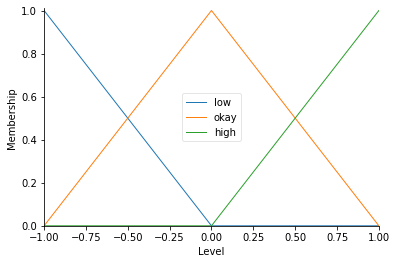

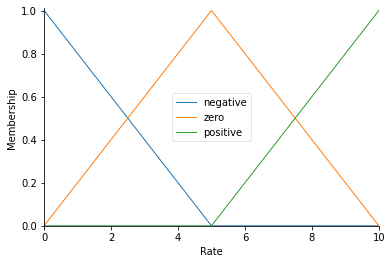

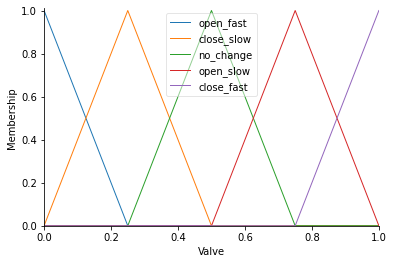

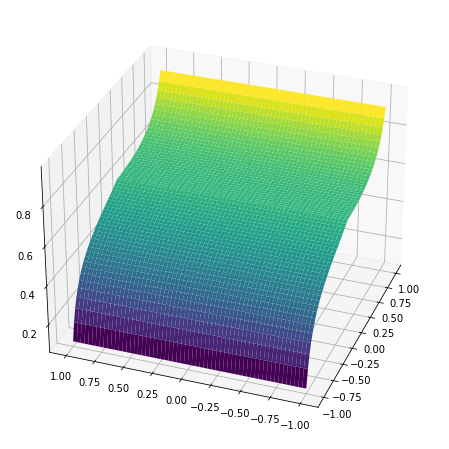

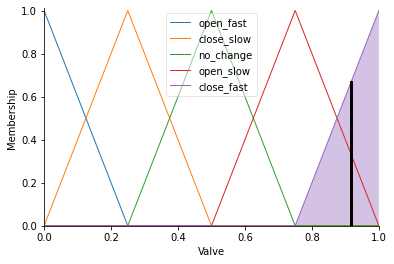

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from skfuzzy.control.controlsystem import Antecedent
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.bipartite import projection

universe1 = np.linspace(-1,1,61)      # level 
universe2 = np.linspace(0,1,61)       # valve 
universe3 = np.linspace(0,10,61)       # rate

# Define the membership functions for the input variables
level=ctrl.Antecedent(universe1,'Level')
rate =ctrl.Antecedent(universe3,'Rate')
# Define the membership functions for the output variable
valve=ctrl.Consequent(universe2,'Valve')

name_level=['low','okay','high']
name_rate=['negative','zero','positive']
name_valve=['open_fast','close_slow','no_change','open_slow','close_fast']


level.automf(names=name_level)
rate.automf(names=name_rate)
valve.automf(names=name_valve)

level.view()
rate.view()
valve.view()

# Define the rules
rule1 = ctrl.Rule(level['okay'], valve['no_change'])
rule2 = ctrl.Rule(level['low'], valve['open_fast'])
rule3 = ctrl.Rule(level['high'], valve['close_fast'])
rule4 = ctrl.Rule(level['okay'] & rate['positive'], valve['close_slow'])
rule5 = ctrl.Rule(level['okay'] & rate['negative'], valve['open_slow'])

#Control system
valve_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
valve_simulation=ctrl.ControlSystemSimulation(valve_ctrl,flush_after_run=61*61+1)
# Compute
upsampled = np.linspace(-1,1,61)
x,y = np.meshgrid(upsampled,upsampled)
z =np.zeros_like(x)
for i in range(61):
  for j in range(61):
      valve_simulation.input['Level']= x[i,j]
      valve_simulation.input['Rate']= y[i,j]
      valve_simulation.compute()  
      z[i,j]= valve_simulation.output['Valve']

# print(valve_simulation.output['valve'])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1 ,cstride=1 ,cmap='viridis',linewidth=0.4,antialiased =True)
cset = ax.contourf(x,y,z,zdir='z',offset = 5,cmap='viridis',anlpha = 0.5)
cset = ax.contourf(x,y,z,zdir='y',offset = 10,cmap='viridis',anlpha = 0.5)
cset = ax.contourf(x,y,z,zdir='x',offset = 15,cmap='viridis',anlpha = 0.5)
ax.view_init(30,200)

# power
valve.view(sim = valve_simulation)


